In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
import math
import re
import requests
import random
import itertools
from numpy import mean, std

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [4]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_excel(r'C:\Users\100_rabh\1. protium\Base_Problem_DataSet.xlsb', engine = 'pyxlsb')
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [6]:
df.shape

(121856, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

### Cleaning the data

#### Removing special characters from numeric column

In [8]:
catg = df.select_dtypes(include=['object'])

In [9]:
catg.head()

,Patron_Salary,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Customer_Vocation,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_3
0,6750,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,Sales,Yes,Yes,Self-employed,NaN
1,20250,15282,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,NaN,Yes,Yes,Government,NaN
2,18000,59527.35,2788.2,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,Realty agents,Yes,Yes,Self-employed,0.329655
3,15750,53870.4,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,Yes,Yes,XNA,0.631355
4,33750,133988.4,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,Laborers,Yes,Yes,Business Entity Type 3,0.355639


In [10]:
special_char = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 
                'Population_Fraction_by_Region', 'Work_Duration_in_Days', 'Elderliness_in_Days',
                'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Rating_Origin_3']
for i in special_char:
    df[i] = df[i].replace('[^0-9]', np.nan, regex=True).astype(float)

In [11]:
df.head(3)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0


#### Removing XNA value from categorical column

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].replace("XNA", np.nan)

In [13]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.upper()
        df[i] = df[i].str.strip()

### Checking the event rate of model

In [14]:
df_er = pd.DataFrame(df['Default'].value_counts())
df_er['EVENT_RATE'] = (df_er['Default'] / df_er['Default'].sum()) * 100
df_er

,Default,EVENT_RATE
0,112011,91.920792
1,9845,8.079208


### Checking the count of missing value

In [15]:
dict_mv_count = {i: df[i].isna().sum() for i in df.columns}

df_mv_count = pd.DataFrame.from_dict(dict_mv_count, orient = 'index', columns = ['MV'])

df_mv_count = df_mv_count.reset_index()

In [16]:
df_mv_count['mv_percent'] = (df_mv_count['MV'] / len(df)) * 100

df_mv_count.sort_values('mv_percent', ascending = False)

,index,MV,mv_percent
20,Private_Dwelling_Duration,80095,65.729221
32,Rating_Origin_1,68835,56.488806
35,Community_Non-Payment_Incidence,61928,50.820641
24,Customer_Vocation,41435,34.003250
34,Rating_Origin_3,26922,22.093290
31,Sort_of_Institution,24694,20.264903
37,Solvency_Information_Agency,18540,15.214680
19,Identity_Age_in_Days,5985,4.911535
33,Rating_Origin_2,5686,4.666163
15,Population_Fraction_by_Region,4868,3.994879


### Selecting only those columns which are having less than 25% missing values

In [17]:
df_mv_final_count = df_mv_count[df_mv_count['mv_percent'] <= 25]

df_mv_final_count.reset_index(inplace = True)

mv_cols = df_mv_final_count['index'].to_list()

df = df[mv_cols]

In [18]:
df.shape

(121856, 35)

In [19]:
df['Customer_Revenue_Category'].fillna(df['Customer_Revenue_Category'].mode()[0], inplace = True)

### Split data into train & test using sample function

In [20]:
df_train = df.sample(frac = 0.8, random_state = 10)
df_test = df.drop(df_train.index)

In [21]:
print('Training set: ', df_train.shape)
print('Testing set: ', df_test.shape)

Training set:  (97485, 35)
Testing set:  (24371, 35)


In [22]:
df_train.head(3)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default
116791,12176300,11250.0,0.0,1.0,1.0,1.0,0.0,101961.0,3382.65,RETIRED,SECONDARY,M,MALE,CL,HOME,0.018634,20099.0,365243.0,7427.0,3514.0,1,0,0,2.0,2.0,3.0,NaN,YES,YES,NaN,0.205747,NaN,0.0,1.0,0
91684,12181707,NaN,1.0,0.0,0.0,0.0,0.0,125640.0,4464.45,SERVICE,GRADUATION,S,MALE,CL,HOME,0.072508,10534.0,1344.0,4940.0,3131.0,1,0,1,1.0,1.0,6.0,14.0,YES,YES,BANK,0.740548,0.675413,1745.0,2.0,0
40523,12120797,13500.0,0.0,0.0,1.0,1.0,0.0,107820.0,3165.30,GOVT JOB,SECONDARY,NaN,FEMALE,CL,HOME,0.018634,20706.0,993.0,9574.0,4177.0,1,1,0,2.0,2.0,3.0,12.0,YES,YES,BUSINESS ENTITY TYPE 2,0.600863,0.526295,603.0,1.0,0


In [23]:
df_test.head(3)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,SERVICE,GRADUATION DROPOUT,W,MALE,CL,FAMILY,0.022800,16790.0,5102.0,NaN,331.0,1,0,0,2.0,2.0,4.0,NaN,YES,YES,SELF-EMPLOYED,0.552795,0.329655,277.0,0.0,0
10,12100935,27000.0,0.0,0.0,1.0,1.0,1.0,67500.00,3375.00,GOVT JOB,GRADUATION,S,MALE,RL,HOME,0.001417,14816.0,2263.0,2933.0,4640.0,1,0,0,2.0,2.0,3.0,12.0,YES,YES,GOVERNMENT,0.770343,0.722393,1799.0,1.0,0
19,12186490,9000.0,0.0,0.0,0.0,0.0,0.0,22500.00,2191.95,SERVICE,SECONDARY,S,MALE,CL,HOME,NaN,NaN,2504.0,6019.0,1191.0,1,0,0,1.0,2.0,2.0,11.0,YES,YES,BUSINESS ENTITY TYPE 2,0.418630,0.595456,2458.0,2.0,0


### Checking the event rate of training set

In [24]:
df_er1 = pd.DataFrame(df_train['Default'].value_counts())
df_er1['EVENT_RATE'] = (df_er1['Default'] / df_er1['Default'].sum()) * 100
df_er1

,Default,EVENT_RATE
0,89607,91.918757
1,7878,8.081243


### Checking the event rate of testing set

In [25]:
df_er2 = pd.DataFrame(df_test['Default'].value_counts())
df_er2['EVENT_RATE'] = (df_er2['Default'] / df_er2['Default'].sum()) * 100
df_er2

,Default,EVENT_RATE
0,22404,91.928932
1,1967,8.071068


### Missing Value treatment

In [26]:
df_train.columns

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Cellphone_Marker',
       'Residential_Phone_Marker', 'Employment_Phone_Operation',
       'Patron_Kin_Count', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Day', 'Request_Submission_Hour',
       'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_2', 'Rating_Origin_3', 'Telecommunication_Switch',
       'Solvency_Information_Agency', 'Default'],
      

### Filling missing value based on median value of customer revenue category

In [27]:
def fill_missing_v(df_train, df_test, i):
    print(i, ":")
    if i != 'Customer_Revenue_Category':
        if df_train[i].dtypes != 'object':
            df_na = df_train.groupby('Customer_Revenue_Category')[i].median().reset_index()
        else:
            df_na = df_train.groupby('Customer_Revenue_Category')[i].apply(pd.Series.mode).reset_index()
            df_na = df_na[df_na['level_1'] == 0]
            df_na.drop('level_1', axis = 1, inplace = True)

        df_na.rename({i: str(i) + '_NA'}, axis = 1, inplace = True)
        print("Before filling tarin: ", df_train[i].isna().sum())
        df_train = pd.merge(df_train,df_na,left_on='Customer_Revenue_Category',right_on='Customer_Revenue_Category')
        df_train[i].fillna(df_train[str(i) + '_NA'], inplace = True)
        print("After filling train: ", df_train[i].isna().sum())
        df_train.drop(str(i) + '_NA', axis = 1, inplace = True)
        print("-------------------------------")
        print("Before filling test: ", df_test[i].isna().sum())
        df_test = pd.merge(df_test,df_na,left_on='Customer_Revenue_Category',right_on='Customer_Revenue_Category')
        df_test[i].fillna(df_test[str(i) + '_NA'], inplace = True)
        print("After filling test: ", df_test[i].isna().sum())
        df_test.drop(str(i) + '_NA', axis = 1, inplace = True)
            
    return df_train, df_test

In [28]:
for i in df_train.columns:

    df_train, df_test = fill_missing_v(df_train, df_test, i)
    print("->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

ID :
Before filling tarin:  0
After filling train:  0
-------------------------------
Before filling test:  0
After filling test:  0
->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Patron_Salary :
Before filling tarin:  2898
After filling train:  0
-------------------------------
Before filling test:  724
After filling test:  0
->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Automobile_Possession :
Before filling tarin:  2875
After filling train:  1
-------------------------------
Before filling test:  706
After filling test:  0
->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Two-Wheeler_Ownership :
Before filling tarin:  2919
After filling train:  0
-------------------------------
Before filling test:  705
After filling test:  0
->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Ongoing_Borrowing :
Before filling tarin:  2916
After filling train:  0
-------------------------------
Before filling test:  719
After filling test:  0
->>>>>>>>>>>>>>

In [29]:
mv_dict = {}

for i in df_train.columns.to_list():
    if df_train[i].dtype == 'object':
        mv_dict.update({i: df_train[i].mode()[0]})
        
    else:
        mv_dict.update({i: df_train[i].median()})


In [30]:
mv_dict

{'ID': 12161003.5,
 'Patron_Salary': 14400.0,
 'Automobile_Possession': 0.0,
 'Two-Wheeler_Ownership': 0.0,
 'Ongoing_Borrowing': 0.0,
 'Residence_Proprietorship': 1.0,
 'Offspring_Number': 0.0,
 'Loan_Capital': 50849.55,
 'Borrowing_Periodic_Payment': 2484.45,
 'Customer_Revenue_Category': 'SERVICE',
 'Patron_Academic_Qualification': 'SECONDARY',
 'Customer_Conjugal_State': 'M',
 'Patron_Sex': 'MALE',
 'Borrowing_Agreement_Category': 'CL',
 'Customer_Living_Arrangement': 'HOME',
 'Population_Fraction_by_Region': 0.01885,
 'Elderliness_in_Days': 15583.0,
 'Work_Duration_in_Days': 2159.0,
 'Enlistment_Period_in_Days': 4406.0,
 'Identity_Age_in_Days': 3148.0,
 'Cellphone_Marker': 1.0,
 'Residential_Phone_Marker': 0.0,
 'Employment_Phone_Operation': 0.0,
 'Patron_Kin_Count': 2.0,
 'Customer_Urban_Area_Ranking': 2.0,
 'Request_Submission_Day': 3.0,
 'Request_Submission_Hour': 12.0,
 'Patron_Constant_Correspondence_Marker': 'YES',
 'Customer_Professional_Communication_Marker': 'YES',
 'Sort

In [31]:
for i in df_train.columns.to_list():
    df_train[i].fillna(mv_dict[i], inplace = True)
    
for i in df_test.columns.to_list():
    df_test[i].fillna(mv_dict[i], inplace = True)

In [32]:
df_train.isna().sum()

ID                                            0
Patron_Salary                                 0
Automobile_Possession                         0
Two-Wheeler_Ownership                         0
Ongoing_Borrowing                             0
Residence_Proprietorship                      0
Offspring_Number                              0
Loan_Capital                                  0
Borrowing_Periodic_Payment                    0
Customer_Revenue_Category                     0
Patron_Academic_Qualification                 0
Customer_Conjugal_State                       0
Patron_Sex                                    0
Borrowing_Agreement_Category                  0
Customer_Living_Arrangement                   0
Population_Fraction_by_Region                 0
Elderliness_in_Days                           0
Work_Duration_in_Days                         0
Enlistment_Period_in_Days                     0
Identity_Age_in_Days                          0
Cellphone_Marker                        

### Outlier Treatment

In [33]:
def describe_(df):
    df1 = df.describe().reset_index()
    df1.drop('index', inplace = True, axis = 1)
#     print(df1)
    
    return df1

def out_zscore(data):
    global outliers, zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        if std != 0:
            z_score = (i - mean) / std
#             print(z_score)
            zscore.append(z_score)
            
            if np.abs(z_score) > threshold:
                outliers.append(i)
        
        else:
            pass
    
    return outliers

def treat_outlier(df, i):
    
    a = np.where(df[i] < lower_percentile, lower_percentile, df[i])
    b = np.where(a >  upper_percentile, upper_percentile, a)
    df[i] = b
    return df

In [34]:
print("Training set: \n")
for i in describe_(df_train).columns:
    if i not in ['ID', 'Default']:
        outliers = out_zscore(df_train[i])
        print("Total number of outliers in", i, ":", len(outliers))
    
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")

print("Testing set: \n")
for i in describe_(df_test).columns:
    if i not in ['ID', 'Default']:
        outliers = out_zscore(df_test[i])
        print("Total number of outliers in", i, ":", len(outliers))

Training set: 

Total number of outliers in Patron_Salary : 939
Total number of outliers in Automobile_Possession : 0
Total number of outliers in Two-Wheeler_Ownership : 0
Total number of outliers in Ongoing_Borrowing : 0
Total number of outliers in Residence_Proprietorship : 0
Total number of outliers in Offspring_Number : 1344
Total number of outliers in Loan_Capital : 1321
Total number of outliers in Borrowing_Periodic_Payment : 935
Total number of outliers in Population_Fraction_by_Region : 2
Total number of outliers in Elderliness_in_Days : 0
Total number of outliers in Work_Duration_in_Days : 0
Total number of outliers in Enlistment_Period_in_Days : 262
Total number of outliers in Identity_Age_in_Days : 0
Total number of outliers in Cellphone_Marker : 1
Total number of outliers in Residential_Phone_Marker : 0
Total number of outliers in Employment_Phone_Operation : 0
Total number of outliers in Patron_Kin_Count : 1270
Total number of outliers in Customer_Urban_Area_Ranking : 0
To

In [35]:
for i in describe_(df_train).columns:
    if i not in ['ID', 'Default']:
        # Computing 5th, 95th percentiles and replacing the outliers
        lower_percentile = np.percentile(df_train[i], 5)
        upper_percentile = np.percentile(df_train[i], 95)
        df_train = treat_outlier(df_train, i)
        df_test = treat_outlier(df_test, i)

In [36]:
print("Training set: \n")
for i in describe_(df_train).columns:
    if i not in ['ID', 'Default']:
        outliers = out_zscore(df_train[i])
        print("Total number of outliers in", i, ":", len(outliers))
        
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
  
print("Testing set: \n")
for i in describe_(df_test).columns:
    if i not in ['ID', 'Default']:
        outliers = out_zscore(df_test[i])
        print("Total number of outliers in", i, ":", len(outliers))

Training set: 

Total number of outliers in Patron_Salary : 0
Total number of outliers in Automobile_Possession : 0
Total number of outliers in Two-Wheeler_Ownership : 0
Total number of outliers in Ongoing_Borrowing : 0
Total number of outliers in Residence_Proprietorship : 0
Total number of outliers in Offspring_Number : 0
Total number of outliers in Loan_Capital : 0
Total number of outliers in Borrowing_Periodic_Payment : 0
Total number of outliers in Population_Fraction_by_Region : 0
Total number of outliers in Elderliness_in_Days : 0
Total number of outliers in Work_Duration_in_Days : 0
Total number of outliers in Enlistment_Period_in_Days : 0
Total number of outliers in Identity_Age_in_Days : 0
Total number of outliers in Cellphone_Marker : 0
Total number of outliers in Residential_Phone_Marker : 0
Total number of outliers in Employment_Phone_Operation : 0
Total number of outliers in Patron_Kin_Count : 0
Total number of outliers in Customer_Urban_Area_Ranking : 0
Total number of o

In [37]:
print("Shape of train:", df_train.shape)
print("Shape of test:", df_test.shape)

Shape of train: (97480, 35)
Shape of test: (24370, 35)


In [38]:
df_train.head(3)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12176300,11250.0,0.0,1.0,1.0,1.0,0.0,101961.0,3382.65,RETIRED,SECONDARY,M,MALE,CL,HOME,0.018634,20099.0,365243.0,7427.0,3514.0,1.0,0.0,0.0,2.0,2.0,3.0,11.0,YES,YES,BUSINESS ENTITY TYPE 2,0.205747,0.593718,0.0,1.0,0
1,12184057,6750.0,0.0,0.0,0.0,1.0,0.0,18201.6,1176.30,RETIRED,SECONDARY,M,FEMALE,CL,HOME,0.005002,22293.0,365243.0,9823.0,4492.0,1.0,0.0,0.0,2.0,3.0,3.0,11.0,YES,YES,BUSINESS ENTITY TYPE 2,0.679736,0.600658,1046.0,1.0,0
2,12208015,9000.0,0.0,1.0,0.0,0.0,0.0,14836.5,1067.85,RETIRED,GRADUATION,M,MALE,CL,MUNICIPAL,0.032561,23191.0,365243.0,11339.0,3171.0,1.0,0.0,0.0,2.0,1.0,4.0,12.0,YES,YES,BUSINESS ENTITY TYPE 2,0.678626,0.593718,471.0,2.0,0


#### Converting float to integer if numeric columns have 2 unique value

In [39]:
for i in df_train.columns:
    if df_train[i].dtypes == 'float':
        if df_train[i].nunique() <= 2:
            df_train[i] = df_train[i].astype(int)
            
for i in df_test.columns:
    if df_test[i].dtypes == 'float':
        if df_test[i].nunique() <= 2:
            df_test[i] = df_test[i].astype(int)

In [40]:
# df_train.to_csv('Train_v1.2.csv', index = False)
# df_test.to_csv('Test_v1.2.csv', index = False)

### Information Value

In [41]:
def iv_woe(data, target, bins, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [42]:
iv, woe = iv_woe(data = df_train, target = 'Default', bins = 4, show_woe = True)

Information value of ID is 7.8e-05
  Variable                      Cutoff      N  Events  % of Events  \
0       ID  (12100000.999, 12130485.5]  24370    1955     0.248254   
1       ID    (12130485.5, 12161003.5]  24370    1996     0.253460   
2       ID   (12161003.5, 12191458.25]  24370    1960     0.248889   
3       ID   (12191458.25, 12221856.0]  24370    1964     0.249397   

   Non-Events  % of Non-Events       WoE        IV  
0       22415         0.250153 -0.007622  0.000014  
1       22374         0.249696  0.014964  0.000056  
2       22410         0.250098 -0.004845  0.000006  
3       22406         0.250053 -0.002628  0.000002  
Information value of Patron_Salary is 0.010128
        Variable               Cutoff      N  Events  % of Events  Non-Events  \
0  Patron_Salary  (6749.999, 11250.0]  30980    2570     0.326349       28410   
1  Patron_Salary   (11250.0, 14400.0]  18366    1596     0.202667       16770   
2  Patron_Salary   (14400.0, 20250.0]  26138    2223     0.

Information value of Population_Fraction_by_Region is 0.009864
                        Variable            Cutoff      N  Events  \
0  Population_Fraction_by_Region     (0.004, 0.01]  24975    2170   
1  Population_Fraction_by_Region    (0.01, 0.0188]  25944    2223   
2  Population_Fraction_by_Region  (0.0188, 0.0264]  22201    1807   
3  Population_Fraction_by_Region  (0.0264, 0.0462]  24360    1675   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.275556       22805         0.254506  0.079465  0.001673  
1     0.282286       23721         0.264729  0.064215  0.001127  
2     0.229460       20394         0.227599  0.008145  0.000015  
3     0.212698       22685         0.253167 -0.174173  0.007048  
Information value of Elderliness_in_Days is 0.071282
              Variable               Cutoff      N  Events  % of Events  \
0  Elderliness_in_Days  (9443.999, 12502.0]  24373    2649     0.336381   
1  Elderliness_in_Days   (12502.0, 15583.0]  24371    2073

Information value of Rating_Origin_3 is 0.246068
          Variable          Cutoff      N  Events  % of Events  Non-Events  \
0  Rating_Origin_3  (0.179, 0.424]  24458    3359     0.426540       21099   
1  Rating_Origin_3  (0.424, 0.521]  28208    2390     0.303492       25818   
2  Rating_Origin_3  (0.521, 0.631]  20631    1178     0.149587       19453   
3  Rating_Origin_3  (0.631, 0.774]  24183     948     0.120381       23235   

   % of Non-Events       WoE        IV  
0         0.235467  0.594136  0.113523  
1         0.288131  0.051939  0.000798  
2         0.217097 -0.372465  0.025145  
3         0.259305 -0.767343  0.106602  
Information value of Telecommunication_Switch is 0.042074
                   Variable            Cutoff      N  Events  % of Events  \
0  Telecommunication_Switch   (-0.001, 287.0]  24412    2342     0.297397   
1  Telecommunication_Switch    (287.0, 752.0]  24906    2320     0.294603   
2  Telecommunication_Switch   (752.0, 1548.0]  23827    1768     0

In [43]:
iv.sort_values('IV',ascending=False)

,Variable,IV
0,Rating_Origin_3,0.246068
0,Rating_Origin_2,0.227251
0,Work_Duration_in_Days,0.102266
0,Sort_of_Institution,0.075148
0,Elderliness_in_Days,0.071282
0,Patron_Academic_Qualification,0.059378
0,Customer_Revenue_Category,0.048111
0,Customer_Urban_Area_Ranking,0.043050
0,Telecommunication_Switch,0.042074
0,Identity_Age_in_Days,0.040180


In [44]:
# iv.to_excel('IV.xlsx', index = False)

### VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df1):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [float(format(variance_inflation_factor(df1.values, i),'f') )for i in range(df1.shape[1])]

    return(vif)

In [46]:
df2 = df_train._get_numeric_data()
df2.head(2)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12176300,11250.0,0,1,1,1,0.0,101961.0,3382.65,0.018634,20099.0,365243.0,7427.0,3514.0,1,0,0,2.0,2.0,3.0,11.0,0.205747,0.593718,0.0,1.0,0
1,12184057,6750.0,0,0,0,1,0.0,18201.6,1176.30,0.005002,22293.0,365243.0,9823.0,4492.0,1,0,0,2.0,3.0,3.0,11.0,0.679736,0.600658,1046.0,1.0,0


In [47]:
VIF=calc_vif(df2)

In [48]:
VIF.sort_values('VIF',ascending=False)

,variables,VIF
14,Cellphone_Marker,119699.066899
6,Offspring_Number,3.623242
17,Patron_Kin_Count,3.540285
8,Borrowing_Periodic_Payment,2.671029
7,Loan_Capital,2.503340
10,Elderliness_in_Days,2.026879
11,Work_Duration_in_Days,1.854916
18,Customer_Urban_Area_Ranking,1.491721
1,Patron_Salary,1.445931
9,Population_Fraction_by_Region,1.327978


In [49]:
# VIF.to_excel('VIF.xlsx', index = False)

### Information Gain

In [50]:
from scipy.stats import entropy
import pandas as pd
def information_gain(members, split):
    entropy_before = entropy(members.value_counts(normalize=True))
    split.name = 'split'
    members.name = 'members'
    grouped_distrib = members.groupby(split) \
                        .value_counts(normalize=True) \
                        .reset_index(name='count') \
                        .pivot_table(index='split', columns='members', values='count').fillna(0) 
    entropy_after = entropy(grouped_distrib, axis=1)
    entropy_after *= split.value_counts(sort=False, normalize=True)
    return entropy_before - entropy_after.sum()

In [51]:
inf_gain = []
for i in df_train.columns:
    if i not in ['ID', 'Default']:
        members = df_train[i]
        split = df_train['Default']
        try:
            inf = information_gain(members, split)
        except:
            inf = "error"
            
        inf_gain.append({
        'VARIABLE': i,
        'Information Gain': round(inf, 4)
        })



In [52]:
df_inf_gain = pd.DataFrame(inf_gain)

df_inf_gain.sort_values('Information Gain', ascending = False)

,VARIABLE,Information Gain
29,Rating_Origin_2,0.1826
15,Elderliness_in_Days,0.0789
17,Enlistment_Period_in_Days,0.0641
7,Borrowing_Periodic_Payment,0.0500
16,Work_Duration_in_Days,0.0449
18,Identity_Age_in_Days,0.0325
6,Loan_Capital,0.0221
31,Telecommunication_Switch,0.0186
30,Rating_Origin_3,0.0142
0,Patron_Salary,0.0031


In [53]:
# df_inf_gain.to_excel('IG_new.xlsx', index = False)

### WOE Binning

In [54]:
num_biv = pd.read_excel(r'numerical_bi_variate.xlsx')

In [55]:
num_biv.head()

,variable,bin,good,bad,count,percentage
0,ID,"[-inf,12122000.0)",16216,1378,17594,0.078
1,ID,"[12122000.0,12130000.0)",5836,547,6383,0.086
2,ID,"[12130000.0,12140000.0)",7410,661,8071,0.082
3,ID,"[12140000.0,12148000.0)",5883,488,6371,0.077
4,ID,"[12148000.0,12174000.0)",19038,1724,20762,0.083


In [56]:
def find(text):
    str1 = text

    return (str1.translate({ord(i): None for i in '%'}))

In [57]:
num_biv['bin'] = num_biv.apply(lambda x: find(x['bin']), axis=1)

### NUMERICAL VARIABLE BINNING

In [58]:
def num_label(row, col, conditions):
    if len(conditions) == 2:
        if (row[col] < conditions[0]):
            return 'Group0'
        elif (conditions[0] <= row[col]) & (row[col] < conditions[1]):
            return 'Group1'
        else:
            return 'Group2'
        
    elif len(conditions) == 3:
        if (row[col] < conditions[0]):
            return 'Group0'
        elif (conditions[0] <= row[col]) & (row[col] < conditions[1]):
            return 'Group1'
        elif (conditions[1] <= row[col]) & (row[col] < conditions[2]):
            return 'Group2'
        else:
            return 'Group3'
        
    elif len(conditions) == 4:
        if (row[col] < conditions[0]):
            return 'Group0'
        elif (conditions[0] <= row[col]) & (row[col] < conditions[1]):
            return 'Group1'
        elif (conditions[1] <= row[col]) & (row[col] < conditions[2]):
            return 'Group2'
        elif (conditions[2] <= row[col]) & (row[col] < conditions[3]):
            return 'Group3'
        else:
            return'Group4'
    
    elif len(conditions) == 5:
        if (row[col] < conditions[0]):
            return 'Group0'
        elif (conditions[0] <= row[col]) & (row[col] < conditions[1]):
            return 'Group1'
        elif (conditions[1] <= row[col]) & (row[col] < conditions[2]):
            return 'Group2'
        elif (conditions[2] <= row[col]) & (row[col] < conditions[3]):
            return 'Group3'
        elif (conditions[3] <= row[col]) & (row[col] < conditions[4]):
            return'Group4'
        else:
            return 'Group5'
    
    else:
        return 'NONE'
        
def catg_bin_num(row, col, num_biv):
    num_biv_1 = num_biv[num_biv['variable'] == col].reset_index(drop = True)
    conditions = []
    for i in num_biv_1.index:
        conditions.append(float(num_biv_1['bin'][i][1:-1].split(',')[1]))
    conditions = conditions[:-1]
    print(conditions)
    row[col + str('_BIN')] = row.apply(lambda row: num_label(row, col, conditions), axis=1)
    return row

In [59]:
df_train = catg_bin_num(df_train, 'Rating_Origin_3', num_biv)
df_test = catg_bin_num(df_test, 'Rating_Origin_3', num_biv)

[0.19000000000000003, 0.3400000000000002, 0.5700000000000004]
[0.19000000000000003, 0.3400000000000002, 0.5700000000000004]


In [60]:
df_train['Rating_Origin_3_BIN'].value_counts()

Group2    44504
Group3    37073
Group1    10528
Group0     5375
Name: Rating_Origin_3_BIN, dtype: int64

In [61]:
df_train = catg_bin_num(df_train, 'Rating_Origin_2', num_biv)
df_test = catg_bin_num(df_test, 'Rating_Origin_2', num_biv)

[0.15000000000000002, 0.4600000000000003, 0.6700000000000005, 0.7300000000000005]
[0.15000000000000002, 0.4600000000000003, 0.6700000000000005, 0.7300000000000005]


In [62]:
df_train['Rating_Origin_2_BIN'].value_counts()

Group2    45488
Group1    24923
Group3    13860
Group4     7827
Group0     5382
Name: Rating_Origin_2_BIN, dtype: int64

In [63]:
df_train = catg_bin_num(df_train, 'Elderliness_in_Days', num_biv)
df_test = catg_bin_num(df_test, 'Elderliness_in_Days', num_biv)

[12600.0, 14800.0, 20000.0]
[12600.0, 14800.0, 20000.0]


In [64]:
df_train['Elderliness_in_Days_BIN'].value_counts()

Group2    32541
Group0    24987
Group3    22026
Group1    17926
Name: Elderliness_in_Days_BIN, dtype: int64

In [65]:
df_train = catg_bin_num(df_train, 'Work_Duration_in_Days', num_biv)
df_test = catg_bin_num(df_test, 'Work_Duration_in_Days', num_biv)

[2000.0, 4000.0]
[2000.0, 4000.0]


In [66]:
df_train['Work_Duration_in_Days_BIN'].value_counts()

Group0    46687
Group2    30908
Group1    19885
Name: Work_Duration_in_Days_BIN, dtype: int64

In [67]:
df_train = catg_bin_num(df_train, 'Telecommunication_Switch', num_biv)
df_test = catg_bin_num(df_test, 'Telecommunication_Switch', num_biv)

[1050.0, 1950.0]
[1050.0, 1950.0]


In [68]:
df_train['Telecommunication_Switch_BIN'].value_counts()

Group0    59528
Group1    25116
Group2    12836
Name: Telecommunication_Switch_BIN, dtype: int64

In [69]:
df_train = catg_bin_num(df_train, 'Customer_Urban_Area_Ranking', num_biv)
df_test = catg_bin_num(df_test, 'Customer_Urban_Area_Ranking', num_biv)

[2.0, 3.0]
[2.0, 3.0]


In [70]:
df_train['Customer_Urban_Area_Ranking_BIN'].value_counts()

Group1    73049
Group2    13664
Group0    10767
Name: Customer_Urban_Area_Ranking_BIN, dtype: int64

### CATEGORICAL VARIABLE BINNING 

In [71]:
def label(row, col, conditions):
    for i in range(len(conditions)):
        if row[col] in conditions[i]:
            return 'Group' + str(i)
        
    
def catg_bin(row, col, num_biv):
    num_biv_1 = num_biv[num_biv['variable'] == col].reset_index(drop = True)
    conditions = []
    for i in num_biv_1.index:
        conditions.append(num_biv_1['bin'][i].split(','))
    
    print(conditions)
    row[col + str('_BIN')] = row.apply(lambda row: label(row, col, conditions), axis=1)
    return row

In [72]:
df_train = catg_bin(df_train, 'Patron_Academic_Qualification', num_biv)
df_test = catg_bin(df_test, 'Patron_Academic_Qualification', num_biv)

[['POST GRAD', 'GRADUATION'], ['GRADUATION DROPOUT', 'SECONDARY', 'JUNIOR SECONDARY']]
[['POST GRAD', 'GRADUATION'], ['GRADUATION DROPOUT', 'SECONDARY', 'JUNIOR SECONDARY']]


In [73]:
df_train['Patron_Academic_Qualification_BIN'].value_counts()

Group1    74338
Group0    23142
Name: Patron_Academic_Qualification_BIN, dtype: int64

In [74]:
df_train['Patron_Academic_Qualification_BIN'].replace({'Group0': 0, 'Group1': 1}, inplace = True)
df_test['Patron_Academic_Qualification_BIN'].replace({'Group0': 0, 'Group1': 1}, inplace = True)

In [75]:
df_train['Patron_Academic_Qualification_BIN'].value_counts()

1    74338
0    23142
Name: Patron_Academic_Qualification_BIN, dtype: int64

In [76]:
df_train = catg_bin(df_train, 'Sort_of_Institution', num_biv)
df_test = catg_bin(df_test, 'Sort_of_Institution', num_biv)

[['INSURANCE', 'INDUSTRY: TYPE 6', 'TRADE: TYPE 6', 'TRADE: TYPE 4', 'UNIVERSITY', 'POLICE', 'SECURITY MINISTRIES', 'MILITARY', 'INDUSTRY: TYPE 12', 'TRANSPORT: TYPE 1', 'BANK', 'ELECTRICITY', 'SCHOOL', 'INDUSTRY: TYPE 2', 'TRADE: TYPE 2', 'TRADE: TYPE 1', 'SERVICES', 'BUSINESS ENTITY TYPE 2', 'INDUSTRY: TYPE 5', 'RELIGION', 'INDUSTRY: TYPE 9', 'KINDERGARTEN', 'CULTURE', 'HOTEL', 'GOVERNMENT', 'TELECOM', 'TRANSPORT: TYPE 2', 'INDUSTRY: TYPE 7', 'INDUSTRY: TYPE 13', 'ADVERTISING', 'MEDICINE'], ['OTHER', 'HOUSING', 'REALTOR', 'BUSINESS ENTITY TYPE 3', 'POSTAL', 'BUSINESS ENTITY TYPE 1', 'INDUSTRY: TYPE 11', 'TRADE: TYPE 7'], ['INDUSTRY: TYPE 3', 'MOBILE', 'TRADE: TYPE 3', 'SELF-EMPLOYED', 'CLEANING', 'TRANSPORT: TYPE 4', 'LEGAL SERVICES', 'RESTAURANT', 'SECURITY', 'AGRICULTURE', 'CONSTRUCTION', 'INDUSTRY: TYPE 10', 'INDUSTRY: TYPE 4', 'INDUSTRY: TYPE 1', 'EMERGENCY', 'TRANSPORT: TYPE 3', 'INDUSTRY: TYPE 8', 'TRADE: TYPE 5']]
[['INSURANCE', 'INDUSTRY: TYPE 6', 'TRADE: TYPE 6', 'TRADE: TYP

In [77]:
df_train['Sort_of_Institution_BIN'].value_counts()

Group0    40462
Group1    35566
Group2    21452
Name: Sort_of_Institution_BIN, dtype: int64

In [78]:
df_train = catg_bin(df_train, 'Customer_Revenue_Category', num_biv)
df_test = catg_bin(df_test, 'Customer_Revenue_Category', num_biv)

[['BUSINESSMAN', 'MATERNITY LEAVE', 'STUDENT', 'RETIRED'], ['GOVT JOB'], ['COMMERCIAL'], ['SERVICE']]
[['BUSINESSMAN', 'MATERNITY LEAVE', 'STUDENT', 'RETIRED'], ['GOVT JOB'], ['COMMERCIAL'], ['SERVICE']]


In [79]:
df_train['Customer_Revenue_Category_BIN'].value_counts()

Group3    51662
Group2    22237
Group0    16903
Group1     6678
Name: Customer_Revenue_Category_BIN, dtype: int64

In [80]:
train = df_train.copy()
test = df_test.copy()

### Model Development

In [81]:
df_train = train.copy()
df_test = test.copy()

In [82]:
model_var = [
'Rating_Origin_3',
# 'Rating_Origin_3_BIN',
'Rating_Origin_2',
# 'Rating_Origin_2_BIN',
'Work_Duration_in_Days',
# 'Work_Duration_in_Days_BIN',
# 'Sort_of_Institution',
'Sort_of_Institution_BIN',
'Elderliness_in_Days',
# 'Elderliness_in_Days_BIN',
# 'Patron_Academic_Qualification',
'Patron_Academic_Qualification_BIN',
# 'Customer_Revenue_Category',
'Customer_Revenue_Category_BIN',
# 'Customer_Urban_Area_Ranking',
# 'Customer_Urban_Area_Ranking_BIN',
'Telecommunication_Switch',
# 'Telecommunication_Switch_BIN',
'Identity_Age_in_Days'
]

In [83]:
df_train.head(2)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default,Rating_Origin_3_BIN,Rating_Origin_2_BIN,Elderliness_in_Days_BIN,Work_Duration_in_Days_BIN,Telecommunication_Switch_BIN,Customer_Urban_Area_Ranking_BIN,Patron_Academic_Qualification_BIN,Sort_of_Institution_BIN,Customer_Revenue_Category_BIN
0,12176300,11250.0,0,1,1,1,0.0,101961.0,3382.65,RETIRED,SECONDARY,M,MALE,CL,HOME,0.018634,20099.0,365243.0,7427.0,3514.0,1,0,0,2.0,2.0,3.0,11.0,YES,YES,BUSINESS ENTITY TYPE 2,0.205747,0.593718,0.0,1.0,0,Group3,Group1,Group3,Group2,Group0,Group1,1,Group0,Group0
1,12184057,6750.0,0,0,0,1,0.0,18201.6,1176.30,RETIRED,SECONDARY,M,FEMALE,CL,HOME,0.005002,22293.0,365243.0,9823.0,4492.0,1,0,0,2.0,3.0,3.0,11.0,YES,YES,BUSINESS ENTITY TYPE 2,0.679736,0.600658,1046.0,1.0,0,Group3,Group3,Group3,Group2,Group0,Group2,1,Group0,Group0


In [84]:
df_train1 = df_train[model_var]

cat_vars = [i for i in df_train1.columns if df_train1[i].dtype == 'object']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_train1[var], prefix=var)
    df_train1=df_train1.join(cat_list)
    
df_train1=df_train1.drop(cat_vars,axis=1)

df_test1 = df_test[model_var]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_test1[var], prefix=var)
    df_test1=df_test1.join(cat_list)
    
df_test1=df_test1.drop(cat_vars,axis=1)

print("Training set : ",df_train1.shape)
print("Test set : ",df_test1.shape)

Training set :  (97480, 14)
Test set :  (24370, 14)


In [85]:
def maximum(a, b):
    if a != b:
        if a[0] >= b[0]:
            largest = a[1]
        else:
            largest = b[1]
            
        return largest
    else:
        print("Equal shapes")
        
tr1 = [len(df_train1.columns), "train"]
te1 = [len(df_test1.columns), "test"]

largest = maximum(tr1, te1)
print("Maximum shape of", largest, "dataframe!!!")

Maximum shape of train dataframe!!!


In [86]:
tr_col = set(df_train1.columns.to_list())
te_col = set(df_test1.columns.to_list())

if largest == 'train':
    x = tr_col.intersection(te_col)
    for i in list(tr_col):
        if i not in list(x):
            print("test:", i)
            df_test1[i] = 0

if largest == 'test':
    x = te_col.intersection(tr_col)
    for i in list(tr_col):
        if i not in list(x):
            print("train:", i)
            df_train1[i] = 0

else:
    pass

print("----------------------------------------")
print("Training set: ", df_train1.shape)
print("Testing set: ", df_test1.shape)

----------------------------------------
Training set:  (97480, 14)
Testing set:  (24370, 14)


In [87]:
X_train = df_train1.copy()
y_train = df_train['Default']
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("\n")

X_test = df_test1.copy()
y_test = df_test['Default']
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("\n")

Shape of X_train:  (97480, 14)
Shape of y_train:  (97480,)


Shape of X_test:  (24370, 14)
Shape of y_test:  (24370,)




### KS Table

In [88]:
def ks(data=None,target=None, prob=None):
    data['target_xgb'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['total'] = (grouped.sum()[target] + grouped.sum()['target_xgb'])
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target_xgb']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target_xgb'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target_xgb'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    
    kstable['ks_stats'] = np.round(((kstable['events'] / kstable['events'].sum()).cumsum() -(kstable['nonevents'] / kstable['nonevents'].sum()).cumsum()), 4) * 100
    kstable['max_ks'] = kstable['ks_stats'].apply(lambda x: '*****' if x == kstable['ks_stats'].max() else '')
    
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 20)
#    print(kstable)
#    print(type(kstable))    
    #Display KS
    from colorama import Fore
#   print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
#     print(type(kstable))
    return(kstable)


### Logistic Regression

In [89]:
lr = LogisticRegression(penalty = 'l2', C = 2.0,
                        solver = 'newton-cg',  max_iter = 500,
                        class_weight="balanced").fit(X_train, y_train)

y_pred_lr1 = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy Score for train:", accuracy_score(y_train, y_pred_lr1) * 100)
print("Accuracy Score for test:", accuracy_score(y_test, y_pred_lr) * 100)
print()

print("ROC AUC Score for train:", roc_auc_score(y_train, y_pred_lr1) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, y_pred_lr) * 100)
print()

print("Precision for train:", precision_score(y_train, y_pred_lr1) * 100)
print("Precision for test:", precision_score(y_test, y_pred_lr) * 100)
print()

print("Recall for train:", recall_score(y_train, y_pred_lr1) * 100)
print("Recall for test:", recall_score(y_test, y_pred_lr) * 100)

Accuracy Score for train: 66.46389002872384
Accuracy Score for test: 66.36438243742306

ROC AUC Score for train: 65.91933556712308
ROC AUC Score for test: 66.21627405237346

Precision for train: 14.645543651698198
Precision for test: 14.714544630720436

Recall for train: 65.26984126984127
Recall for test: 66.03965429588206


In [90]:
X_train_prob = list(lr.predict_proba(X_train)[:,1])
X_test_prob = list(lr.predict_proba(X_test)[:,1])

train['Prob_score_LR'] = X_train_prob
test['Prob_score_LR'] = X_test_prob

In [91]:
print("ROC AUC Score for train:", roc_auc_score(y_train, X_train_prob) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, X_test_prob) * 100)

ROC AUC Score for train: 71.47867634228886
ROC AUC Score for test: 71.90780403552334


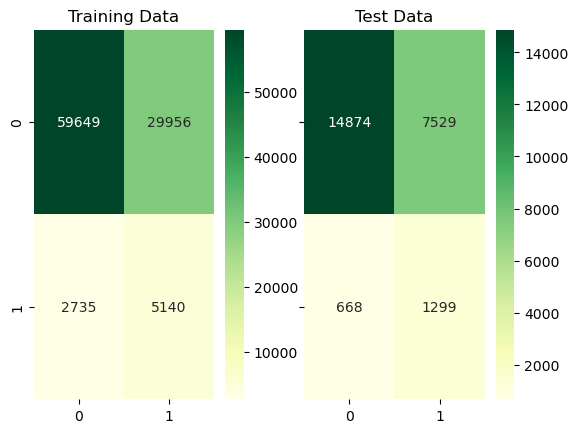

In [92]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_lr1)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_lr)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [93]:
lr_train_ks = ks(train, 'Default','Prob_score_LR')
lr_test_ks = ks(test, 'Default','Prob_score_LR')

In [94]:
lr_train_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.692275,0.912930,9748,2243,7505,28.48%,8.38%,28.48%,8.38%,20.1,20.11,
2,0.602294,0.692271,9747,1359,8388,17.26%,9.36%,45.74%,17.74%,28.0,28.00,
3,0.535785,0.602292,9749,1043,8706,13.24%,9.72%,58.98%,27.45%,31.5,31.53,*****
4,0.477367,0.535778,9748,784,8964,9.96%,10.00%,68.94%,37.46%,31.5,31.48,
5,0.425060,0.477365,9748,628,9120,7.97%,10.18%,76.91%,47.63%,29.3,29.28,
6,0.376202,0.425050,9748,536,9212,6.81%,10.28%,83.72%,57.92%,25.8,25.81,
7,0.327850,0.376198,9748,457,9291,5.80%,10.37%,89.52%,68.28%,21.2,21.24,
8,0.278160,0.327848,9748,357,9391,4.53%,10.48%,94.06%,78.76%,15.3,15.29,
9,0.221997,0.278160,9748,293,9455,3.72%,10.55%,97.78%,89.32%,8.5,8.46,


In [95]:
lr_test_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.691324,0.912975,2437,552,1885,28.06%,8.41%,28.06%,8.41%,19.6,19.65,
2,0.604645,0.691282,2437,365,2072,18.56%,9.25%,46.62%,17.66%,29.0,28.96,
3,0.537064,0.604639,2437,250,2187,12.71%,9.76%,59.33%,27.42%,31.9,31.90,*****
4,0.478280,0.537052,2437,196,2241,9.96%,10.00%,69.29%,37.43%,31.9,31.87,
5,0.426154,0.478213,2437,163,2274,8.29%,10.15%,77.58%,47.58%,30.0,30.00,
6,0.376883,0.426151,2437,136,2301,6.91%,10.27%,84.49%,57.85%,26.6,26.64,
7,0.328972,0.376868,2437,108,2329,5.49%,10.40%,89.98%,68.25%,21.7,21.74,
8,0.278238,0.328967,2437,89,2348,4.52%,10.48%,94.51%,78.73%,15.8,15.78,
9,0.223334,0.278198,2437,66,2371,3.36%,10.58%,97.86%,89.31%,8.6,8.56,


### Decision Tree

In [96]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =6, splitter = "random",
                            min_samples_split = 4, max_features = "sqrt", random_state = 11,
                            class_weight="balanced")
dt = clf.fit(X_train, y_train)

y_pred_dt1 = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy Score for train:", accuracy_score(y_train, y_pred_dt1) * 100)
print("Accuracy Score for test:", accuracy_score(y_test, y_pred_dt) * 100)
print()

print("ROC AUC Score for train:", roc_auc_score(y_train, y_pred_dt1) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, y_pred_dt) * 100)
print()

print("Precision for train:", precision_score(y_train, y_pred_dt1) * 100)
print("Precision for test:", precision_score(y_test, y_pred_dt) * 100)
print()

print("Recall for train:", recall_score(y_train, y_pred_dt1) * 100)
print("Recall for test:", recall_score(y_test, y_pred_dt) * 100)

Accuracy Score for train: 62.46717275338531
Accuracy Score for test: 62.44562987279442

ROC AUC Score for train: 63.34575681806306
ROC AUC Score for test: 63.389235785996334

Precision for train: 13.05142327688269
Precision for test: 13.051527306386918

Recall for train: 64.39365079365079
Recall for test: 64.51448906964922


In [97]:
X_train_prob = list(clf.predict_proba(X_train)[:,1])
X_test_prob = list(clf.predict_proba(X_test)[:,1])

train['Prob_score_dt'] = X_train_prob
test['Prob_score_dt'] = X_test_prob

In [98]:
print("ROC AUC Score for train:", roc_auc_score(y_train, X_train_prob) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, X_test_prob) * 100)

ROC AUC Score for train: 68.27222899799207
ROC AUC Score for test: 68.02636984329732


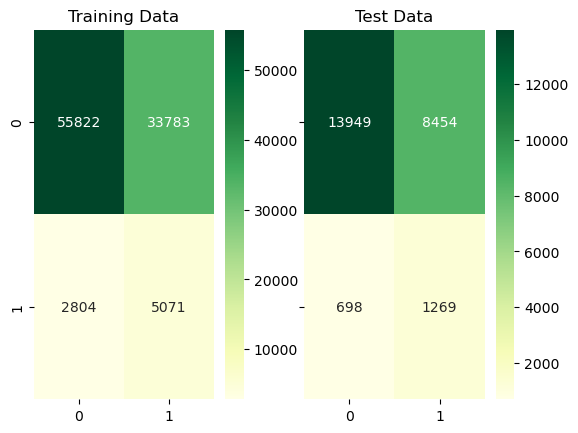

In [99]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_dt1)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_dt)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [100]:
dt_train_ks = ks(train, 'Default','Prob_score_dt')
dt_test_ks = ks(test, 'Default','Prob_score_dt')

In [101]:
dt_train_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.675193,0.810741,7606,1720,5886,21.84%,6.57%,21.84%,6.57%,15.3,15.27,
2,0.580912,0.665688,10432,1331,9101,16.90%,10.16%,38.74%,16.73%,22.0,22.02,
3,0.567792,0.567792,2425,251,2174,3.19%,2.43%,41.93%,19.15%,22.8,22.78,
4,0.505842,0.558740,18391,1769,16622,22.46%,18.55%,64.39%,37.70%,26.7,26.69,*****
5,0.427827,0.495119,7739,541,7198,6.87%,8.03%,71.26%,45.74%,25.5,25.53,
6,0.410908,0.424444,3998,241,3757,3.06%,4.19%,74.32%,49.93%,24.4,24.40,
7,0.410149,0.410149,12745,734,12011,9.32%,13.40%,83.64%,63.33%,20.3,20.31,
8,0.340636,0.406417,13665,712,12953,9.04%,14.46%,92.69%,77.79%,14.9,14.90,
9,0.269131,0.319470,10384,357,10027,4.53%,11.19%,97.22%,88.98%,8.2,8.24,


In [102]:
dt_test_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.675193,0.810741,1908,414,1494,21.05%,6.67%,21.05%,6.67%,14.4,14.38,
2,0.580912,0.665688,2653,356,2297,18.10%,10.25%,39.15%,16.92%,22.2,22.22,
3,0.567792,0.567792,592,56,536,2.85%,2.39%,41.99%,19.31%,22.7,22.68,
4,0.505842,0.558740,4570,443,4127,22.52%,18.42%,64.51%,37.74%,26.8,26.78,*****
5,0.427827,0.495119,1983,116,1867,5.90%,8.33%,70.41%,46.07%,24.3,24.34,
6,0.410908,0.424444,1025,66,959,3.36%,4.28%,73.77%,50.35%,23.4,23.42,
7,0.410149,0.410149,3209,204,3005,10.37%,13.41%,84.14%,63.76%,20.4,20.37,
8,0.340636,0.406417,3442,172,3270,8.74%,14.60%,92.88%,78.36%,14.5,14.52,
9,0.269131,0.319470,2536,87,2449,4.42%,10.93%,97.31%,89.29%,8.0,8.01,


### Random Forest

In [103]:
rf = RandomForestClassifier(n_estimators=200, max_depth = 7,
                            criterion = 'gini', min_samples_split = 5,
                            max_features = 'sqrt', max_leaf_nodes = 3,
                            class_weight = "balanced").fit(X_train, y_train)

y_pred_rf1 = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy Score for train:", accuracy_score(y_train, y_pred_rf1) * 100)
print("Accuracy Score for test:", accuracy_score(y_test, y_pred_rf) * 100)
print()

print("ROC AUC Score for train:", roc_auc_score(y_train, y_pred_rf1) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, y_pred_rf) * 100)
print()

print("Precision for train:", precision_score(y_train, y_pred_rf1) * 100)
print("Precision for test:", precision_score(y_test, y_pred_rf) * 100)
print()

print("Recall for train:", recall_score(y_train, y_pred_rf1) * 100)
print("Recall for test:", recall_score(y_test, y_pred_rf) * 100)

Accuracy Score for train: 68.0313910545753
Accuracy Score for test: 67.6364382437423

ROC AUC Score for train: 65.20255087806007
ROC AUC Score for test: 65.8415171582733

Precision for train: 14.742929812874706
Precision for test: 14.87063849988132

Recall for train: 61.828571428571436
Recall for test: 63.70106761565836


In [104]:
X_train_prob = list(rf.predict_proba(X_train)[:,1])
X_test_prob = list(rf.predict_proba(X_test)[:,1])

train['Prob_score_rf'] = X_train_prob
test['Prob_score_rf'] = X_test_prob

In [105]:
print("ROC AUC Score for train:", roc_auc_score(y_train, X_train_prob) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, X_test_prob) * 100)

ROC AUC Score for train: 70.2381074610526
ROC AUC Score for test: 70.99015422098422


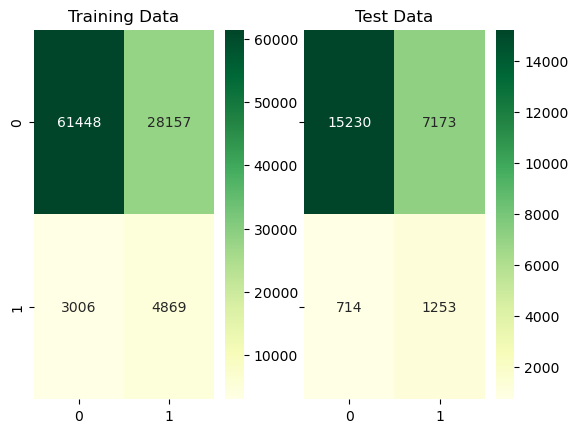

In [106]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_rf1)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_rf)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [107]:
rf_train_ks = ks(train, 'Default','Prob_score_rf')
rf_test_ks = ks(test, 'Default','Prob_score_rf')

In [108]:
rf_train_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.565445,0.637459,9748,2079,7669,26.40%,8.56%,26.40%,8.56%,17.8,17.84,
2,0.537502,0.565438,9748,1461,8287,18.55%,9.25%,44.95%,17.81%,27.1,27.15,
3,0.506980,0.537490,9748,966,8782,12.27%,9.80%,57.22%,27.61%,29.6,29.61,
4,0.490184,0.506979,9748,839,8909,10.65%,9.94%,67.87%,37.55%,30.3,30.32,*****
5,0.470787,0.490180,9737,624,9113,7.92%,10.17%,75.80%,47.72%,28.1,28.08,
6,0.459622,0.470787,9752,531,9221,6.74%,10.29%,82.54%,58.01%,24.5,24.53,
7,0.443079,0.459621,9744,432,9312,5.49%,10.39%,88.03%,68.40%,19.6,19.62,
8,0.424567,0.443077,9758,395,9363,5.02%,10.45%,93.04%,78.85%,14.2,14.19,
9,0.402790,0.424567,9749,288,9461,3.66%,10.56%,96.70%,89.41%,7.3,7.29,


In [109]:
rf_test_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.566189,0.637459,2437,539,1898,27.40%,8.47%,27.40%,8.47%,18.9,18.93,
2,0.538567,0.566158,2437,351,2086,17.84%,9.31%,45.25%,17.78%,27.5,27.46,
3,0.508097,0.538553,2437,261,2176,13.27%,9.71%,58.52%,27.50%,31.0,31.02,
4,0.490860,0.508090,2437,204,2233,10.37%,9.97%,68.89%,37.46%,31.4,31.42,*****
5,0.471243,0.490835,2437,165,2272,8.39%,10.14%,77.28%,47.61%,29.7,29.67,
6,0.460179,0.471237,2436,132,2304,6.71%,10.28%,83.99%,57.89%,26.1,26.10,
7,0.443863,0.460171,2438,96,2342,4.88%,10.45%,88.87%,68.34%,20.5,20.52,
8,0.425554,0.443858,2437,69,2368,3.51%,10.57%,92.37%,78.91%,13.5,13.46,
9,0.403656,0.425537,2437,86,2351,4.37%,10.49%,96.75%,89.41%,7.3,7.34,


### XG Boost

In [110]:
xgb_cl = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree',learning_rate=0.05,max_depth=7,
                               base_score=0.5, n_estimators=200, num_parallel_tree=3, eval_metric='auc',
                               tree_method='hist', grow_policy='lossguide', scale_pos_weight = 11,
                               gamma = 25, colsample_bytree = 0.5
                              ).fit(X_train, y_train)

y_pred_xg1 = xgb_cl.predict(X_train)
y_pred_xg = xgb_cl.predict(X_test)

print("Accuracy Score for train:", accuracy_score(y_train, y_pred_xg1) * 100)
print("Accuracy Score for test:", accuracy_score(y_test, y_pred_xg) * 100)
print()

print("ROC AUC Score for train:", roc_auc_score(y_train, y_pred_xg1) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, y_pred_xg) * 100)
print()

print("Precision for train:", precision_score(y_train, y_pred_xg1) * 100)
print("Precision for test:", precision_score(y_test, y_pred_xg) * 100)
print()

print("Recall for train:", recall_score(y_train, y_pred_xg1) * 100)
print("Recall for test:", recall_score(y_test, y_pred_xg) * 100)


Accuracy Score for train: 71.31719327041445
Accuracy Score for test: 70.61551087402545

ROC AUC Score for train: 69.76961638514008
ROC AUC Score for test: 67.8328370893932

Precision for train: 17.376474027872526
Precision for test: 16.41231246766684

Recall for train: 67.92380952380952
Recall for test: 64.51448906964922


In [111]:
X_train_prob = list(xgb_cl.predict_proba(X_train)[:,1])
X_test_prob = list(xgb_cl.predict_proba(X_test)[:,1])

train['Prob_score_XGB'] = X_train_prob
test['Prob_score_XGB'] = X_test_prob

In [112]:
print("ROC AUC Score for train:", roc_auc_score(y_train, X_train_prob) * 100)
print("ROC AUC Score for test:", roc_auc_score(y_test, X_test_prob) * 100)

ROC AUC Score for train: 76.98846177624371
ROC AUC Score for test: 73.75524548570132


In [113]:
feat_imp = pd.DataFrame.from_dict(zip(list(X_train.columns), xgb_cl.feature_importances_*100)).sort_values(by = 1, ascending = False)
# feat_imp.to_excel('feature_imp_xgb.xlsx', index = False)
feat_imp

,0,1
0,Rating_Origin_3,17.331175
1,Rating_Origin_2,15.423807
4,Patron_Academic_Qualification_BIN,14.652843
7,Sort_of_Institution_BIN_Group0,9.228308
2,Work_Duration_in_Days,6.175183
13,Customer_Revenue_Category_BIN_Group3,4.929128
9,Sort_of_Institution_BIN_Group2,4.799886
3,Elderliness_in_Days,4.503168
5,Telecommunication_Switch,4.501728
6,Identity_Age_in_Days,4.084627


In [114]:
feat_imp[0].values

array(['Rating_Origin_3', 'Rating_Origin_2',
       'Patron_Academic_Qualification_BIN',
       'Sort_of_Institution_BIN_Group0', 'Work_Duration_in_Days',
       'Customer_Revenue_Category_BIN_Group3',
       'Sort_of_Institution_BIN_Group2', 'Elderliness_in_Days',
       'Telecommunication_Switch', 'Identity_Age_in_Days',
       'Customer_Revenue_Category_BIN_Group0',
       'Sort_of_Institution_BIN_Group1',
       'Customer_Revenue_Category_BIN_Group2',
       'Customer_Revenue_Category_BIN_Group1'], dtype=object)

In [115]:
xg_train_ks = ks(train,'Default','Prob_score_XGB')
xg_test_ks = ks(test,'Default','Prob_score_XGB')

In [116]:
# xg_train_ks.to_csv('xgboost_ks_train.csv', index = False)
xg_train_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.674366,0.889202,9748,2580,7168,32.76%,8.00%,32.76%,8.00%,24.8,24.76,
2,0.578382,0.674342,9748,1522,8226,19.33%,9.18%,52.09%,17.18%,34.9,34.91,
3,0.509195,0.578377,9748,1114,8634,14.15%,9.64%,66.23%,26.82%,39.4,39.42,*****
4,0.451010,0.509176,9748,782,8966,9.93%,10.01%,76.17%,36.82%,39.3,39.34,
5,0.399702,0.451008,9748,633,9115,8.04%,10.17%,84.20%,46.99%,37.2,37.21,
6,0.352264,0.399688,9748,488,9260,6.20%,10.33%,90.40%,57.33%,33.1,33.07,
7,0.307765,0.352255,9748,363,9385,4.61%,10.47%,95.01%,67.80%,27.2,27.21,
8,0.260447,0.307759,9748,214,9534,2.72%,10.64%,97.73%,78.44%,19.3,19.28,
9,0.204203,0.260445,9748,130,9618,1.65%,10.73%,99.38%,89.18%,10.2,10.20,


In [117]:
# xg_test_ks.to_csv('xgboost_ks_test.csv', index = False)
xg_test_ks

,min_prob,max_prob,total,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS,ks_stats,max_ks
Decile,,,,,,,,,,,,
1,0.673089,0.884531,2437,591,1846,30.05%,8.24%,30.05%,8.24%,21.8,21.81,
2,0.580305,0.673050,2437,364,2073,18.51%,9.25%,48.55%,17.49%,31.1,31.06,
3,0.511170,0.580277,2437,282,2155,14.34%,9.62%,62.89%,27.11%,35.8,35.78,*****
4,0.451298,0.511164,2437,184,2253,9.35%,10.06%,72.24%,37.17%,35.1,35.07,
5,0.400283,0.451285,2437,167,2270,8.49%,10.13%,80.73%,47.30%,33.4,33.43,
6,0.352457,0.400277,2437,119,2318,6.05%,10.35%,86.78%,57.65%,29.1,29.13,
7,0.307281,0.352444,2437,87,2350,4.42%,10.49%,91.20%,68.14%,23.1,23.07,
8,0.260690,0.307279,2437,72,2365,3.66%,10.56%,94.87%,78.69%,16.2,16.17,
9,0.206620,0.260689,2437,61,2376,3.10%,10.61%,97.97%,89.30%,8.7,8.67,


### ROC Curve

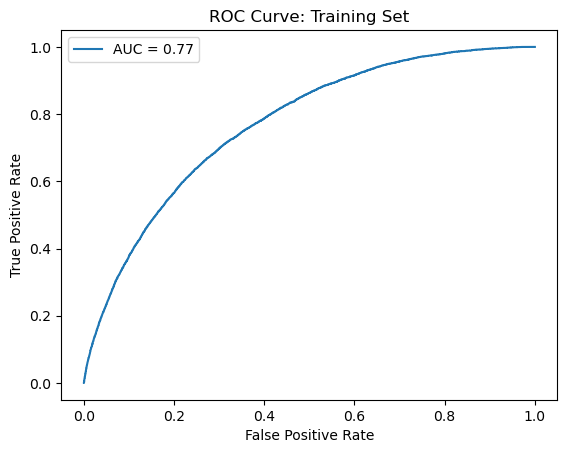

In [118]:
fpr, tpr, thresholds = roc_curve(y_train, X_train_prob)
auc = roc_auc_score(y_train, X_train_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('ROC Curve: Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

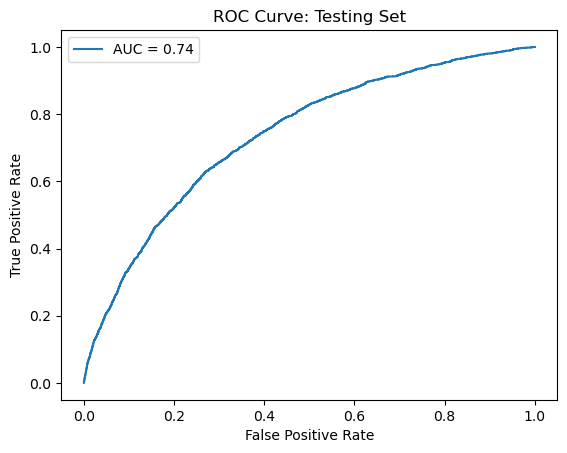

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, X_test_prob)
auc = roc_auc_score(y_test, X_test_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('ROC Curve: Testing Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Confusion Matrix

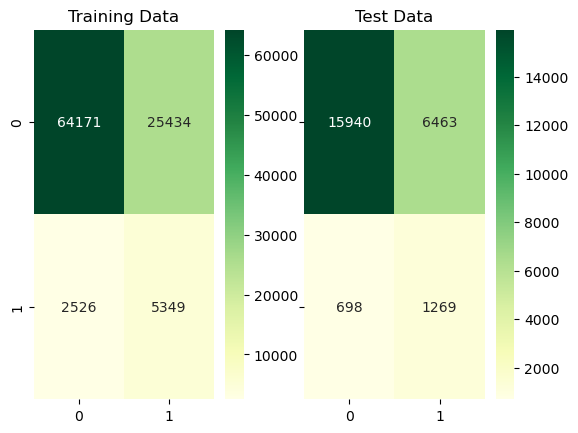

In [120]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_xg1)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_xg)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

### Final Output

#### Creating 10 deciles based on final probabilities

In [121]:
train.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Customer_Urban_Area_Ranking_BIN,Patron_Academic_Qualification_BIN,Sort_of_Institution_BIN,Customer_Revenue_Category_BIN,Prob_score_LR,target_xgb,bucket,Prob_score_dt,Prob_score_rf,Prob_score_XGB
0,12176300,11250.0,0,1,1,1,0.0,101961.0,3382.65,RETIRED,...,Group1,1,Group0,Group0,0.561069,1,"(0.451, 0.509]",0.410149,0.473193,0.490181
1,12184057,6750.0,0,0,0,1,0.0,18201.6,1176.30,RETIRED,...,Group2,1,Group0,Group0,0.256106,1,"(0.0584, 0.204]",0.269131,0.392509,0.194377
2,12208015,9000.0,0,1,0,0,0.0,14836.5,1067.85,RETIRED,...,Group0,0,Group0,Group0,0.187204,1,"(0.204, 0.26]",0.362619,0.385868,0.251559
3,12144081,8100.0,0,0,0,1,0.0,24727.5,1733.85,RETIRED,...,Group1,0,Group0,Group0,0.155827,1,"(0.0584, 0.204]",0.213485,0.386695,0.172119
4,12134177,13500.0,0,1,1,1,0.0,28670.4,1275.75,RETIRED,...,Group1,0,Group0,Group0,0.204042,1,"(0.204, 0.26]",0.213485,0.391024,0.227604


In [122]:
# concatenating df1 and df2 along rows
df_output = pd.concat([train, test], axis=0)
df_output = df_output.sort_values('Prob_score_XGB', ascending = False)
df_output.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Customer_Urban_Area_Ranking_BIN,Patron_Academic_Qualification_BIN,Sort_of_Institution_BIN,Customer_Revenue_Category_BIN,Prob_score_LR,target_xgb,bucket,Prob_score_dt,Prob_score_rf,Prob_score_XGB
53820,12160892,14850.0,1,0,1,1,2.0,34337.7,2248.65,SERVICE,...,Group1,1,Group2,Group3,0.905019,1,"(0.674, 0.889]",0.810741,0.636541,0.889202
38287,12123269,15300.0,0,0,0,1,0.0,112500.0,3289.50,SERVICE,...,Group1,1,Group1,Group3,0.896139,1,"(0.674, 0.889]",0.810741,0.637430,0.888186
53532,12203859,9000.0,0,0,0,0,0.0,34826.4,2751.30,SERVICE,...,Group1,1,Group1,Group3,0.888449,0,"(0.674, 0.889]",0.810741,0.636760,0.887441
55048,12189082,9900.0,0,0,1,1,1.0,34368.3,2337.75,SERVICE,...,Group1,1,Group2,Group3,0.894414,0,"(0.674, 0.889]",0.810741,0.635366,0.887206
23898,12111535,15750.0,1,0,1,0,1.0,14220.0,1221.75,SERVICE,...,Group1,1,Group2,Group3,0.902756,0,"(0.674, 0.889]",0.766536,0.636541,0.886523


In [123]:
#calculate decile of each value in data frame
df_output['Decile'] = pd.qcut(df_output['Prob_score_XGB'], 10, labels=False)

In [124]:
df_output.head(3)

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Academic_Qualification_BIN,Sort_of_Institution_BIN,Customer_Revenue_Category_BIN,Prob_score_LR,target_xgb,bucket,Prob_score_dt,Prob_score_rf,Prob_score_XGB,Decile
53820,12160892,14850.0,1,0,1,1,2.0,34337.7,2248.65,SERVICE,...,1,Group2,Group3,0.905019,1,"(0.674, 0.889]",0.810741,0.636541,0.889202,9
38287,12123269,15300.0,0,0,0,1,0.0,112500.0,3289.50,SERVICE,...,1,Group1,Group3,0.896139,1,"(0.674, 0.889]",0.810741,0.637430,0.888186,9
53532,12203859,9000.0,0,0,0,0,0.0,34826.4,2751.30,SERVICE,...,1,Group1,Group3,0.888449,0,"(0.674, 0.889]",0.810741,0.636760,0.887441,9


In [125]:
df_output['ACTION_BUCKET'] = np.where((df_output['Decile'] < 3), "C.LOW",
                           np.where((3 <= df_output['Decile']) & (df_output['Decile'] < 7), "B.MEDIUM", "A.HIGH"))

In [126]:
df_output['ACTION_BUCKET'].value_counts(normalize = True)

B.MEDIUM    0.4
A.HIGH      0.3
C.LOW       0.3
Name: ACTION_BUCKET, dtype: float64

In [127]:
# df_output[['ID', 'ACTION_BUCKET']].to_excel('Final_Output.xlsx', index = False)